# Plot Gas Prices

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")

In [2]:
countries = pd.read_excel("./data/gPrices.xlsx", sheet_name='countries', header=None)
prices = pd.read_excel("./data/gPrices.xlsx", sheet_name='prices', header=None)

country = "Germany"
country_prices = prices.iloc[:, countries.T[0].to_list().index(country)]

A common way to develop for loops is to first write the code body for a specific value of the looping variable. Then once we know your code works, add the loop.

In [3]:
c = np.zeros((len(countries.T), 2))
for k in range(len(countries.T)):
    prices_nan = prices.iloc[:, k].isna()
    c[k, :] = np.polyfit(country_prices[~prices_nan], prices.iloc[:, k][~prices_nan], 1)

linear_fit = np.expand_dims(country_prices, axis=1) * np.expand_dims(c[:, 0], axis=1).T + np.expand_dims(c[:, 1], axis=1).T

Plot linear fit.

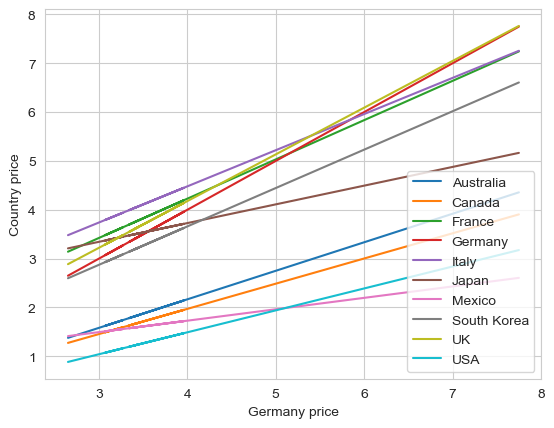

In [4]:
plt.figure()
plt.plot(country_prices, linear_fit)
plt.legend(countries.iloc[0])
plt.xlabel(country + " price")
plt.ylabel("Country price")
plt.show()